In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

# 샘플데이터

In [4]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [6]:
flights.shape

(144, 3)

In [7]:
# 연도별 데이터 수
flights['year'].value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

In [8]:
# 월별 데이터수
flights['month'].value_counts()

Dec    12
Nov    12
Oct    12
Sep    12
Aug    12
Jul    12
Jun    12
May    12
Apr    12
Mar    12
Feb    12
Jan    12
Name: month, dtype: int64

# 연도별 승객수의 변화
## matplotlib으로 시각화
- plt.plot(x,y)

### 데이터 가공

In [9]:
flights.head(1)

,year,month,passengers
0,1949,Jan,112


In [12]:
flights_year = flights.groupby('year')['passengers'].sum()
flights_year

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

### 시각화

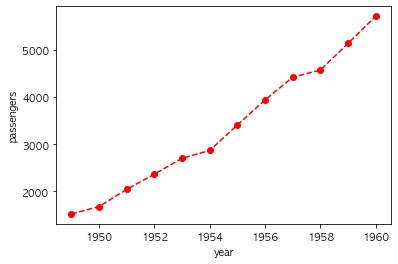

In [16]:
plt.plot(flights_year, 'ro--')
plt.xlabel('year')
plt.ylabel('passengers')
plt.show()

## seaborn
- `sns.lineplot(data=데이터프레임, x=x축컬럼, y=y축컬럼, estimator=통계함수)`<br>
    estimator를 생략하면 평균으로 통계를 적용함
<br><br>
- 전체 데이터로 차트를 그리면 신뢰구간 표시

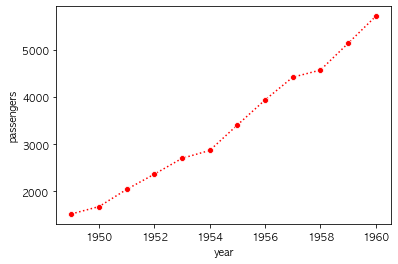

In [22]:
sns.lineplot(data=flights,x='year',y='passengers', estimator=sum, ci=None, color='r', marker='o', ls=':')
plt.show()

# 연도-월별 승객수의 변화
## matplotlib으로 시각화
### 데이터 가공

In [26]:
flights_pivot = flights.pivot(index='year', columns='month', values='passengers')
flights_pivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


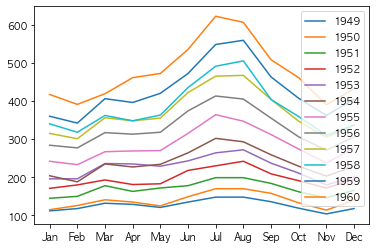

In [34]:
for i in range(12):
    plt.plot(flights_pivot.iloc[i], label=flights_pivot.index[i])
plt.legend()
plt.show()

## seaborn으로 시각화

<AxesSubplot:xlabel='month', ylabel='passengers'>

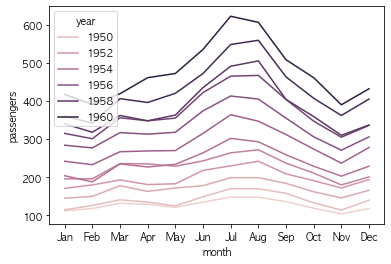

In [37]:
sns.lineplot(data=flights, x='month', y='passengers', ci=None, hue='year')